In [1]:
import pandas as pd
import numpy as np

# Generate synthetic business data for linear regression
np.random.seed(42)  # For reproducibility

# Independent variable: Advertising Spend (in $1000s)
ad_spend = np.random.uniform(5, 50, 100)  # Advertising spend between $5000 and $50000

# Dependent variable: Sales (in $1000s)
# Sales = 3.5 * Advertising Spend + noise
noise = np.random.normal(0, 5, 100)  # Adding some noise
data_sales = 3.5 * ad_spend + noise

# Create a DataFrame
data = pd.DataFrame({
    'Advertising_Spend': ad_spend,
    'Sales': data_sales
})

# Save the dataset to a CSV file
data.to_csv('business_linear_regression_dataset.csv', index=False)

print("Dataset saved as 'business_linear_regression_dataset.csv'")

Dataset saved as 'business_linear_regression_dataset.csv'


In [2]:
df = pd.read_csv('business_linear_regression_dataset.csv')
df

,Advertising_Spend,Sales
0,21.854305,76.925304
1,47.782144,165.742467
2,37.939727,133.247850
3,31.939632,101.850867
4,12.020839,40.974576
...,...,...
95,27.220802,91.193755
96,28.522977,99.444912
97,24.239346,86.543470
98,6.143861,22.886966


In [3]:
df.head()

,Advertising_Spend,Sales
0,21.854305,76.925304
1,47.782144,165.742467
2,37.939727,133.247850
3,31.939632,101.850867
4,12.020839,40.974576


In [4]:
df.shape

(100, 2)

In [5]:
df.isnull().sum()

Advertising_Spend    0
Sales                0
dtype: int64

In [6]:
df[df.duplicated()]

,Advertising_Spend,Sales


In [7]:
df.describe()

,Advertising_Spend,Sales
count,100.000000,100.000000
mean,26.158133,91.548065
std,13.387023,46.390746
min,5.248495,20.026177
25%,13.694034,49.860209
50%,25.886410,88.989364
75%,37.859140,134.158092
max,49.409912,176.843807


In [8]:
import matplotlib.pyplot as plt   


Text(0, 0.5, 'Sales')

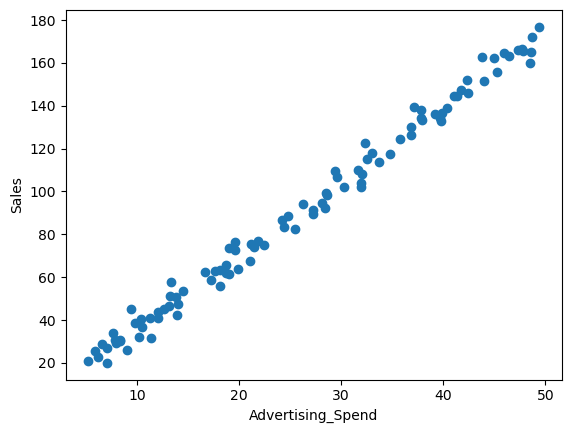

In [9]:
plt.scatter(df['Advertising_Spend'],df['Sales'])
plt.xlabel('Advertising_Spend')
plt.ylabel('Sales')

In [10]:
y = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [11]:
y

0      76.925304
1     165.742467
2     133.247850
3     101.850867
4      40.974576
         ...    
95     91.193755
96     99.444912
97     86.543470
98     22.886966
99     38.628816
Name: Sales, Length: 100, dtype: float64

In [12]:
x = df['Advertising_Spend']  
x

0     21.854305
1     47.782144
2     37.939727
3     31.939632
4     12.020839
        ...    
95    27.220802
96    28.522977
97    24.239346
98     6.143861
99     9.855114
Name: Advertising_Spend, Length: 100, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

In [17]:
x = df[['Advertising_Spend']]  # Reshape x to be a DataFrame
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2) # Use the reshaped x for splitting
lr = LinearRegression()
lr.fit(x_train,y_train) # Fit the model with the reshaped x_train

LinearRegression()

In [18]:
y_pred = lr.predict(x_test)

In [19]:
y_pred

array([100.05767433, 128.46020352, 160.03864457, 117.6514073 ,
        42.54137295,  29.75953947,  46.57018319, 138.50678797,
        66.71503303, 168.82164694,  27.27007423,  84.89485291,
        37.2451645 ,  19.07198571,  68.95291169,  86.86188203,
        51.32951603, 161.99668312, 148.04791464,  25.26485585])

In [20]:
y_test

17     98.510827
74    130.082496
43    164.477628
87    113.811890
5      43.854700
77     30.323301
14     46.622820
76    135.574956
84     61.606307
34    159.993189
6      34.037639
97     86.543470
40     36.547463
72     20.979441
59     76.489199
39     88.331754
13     53.509747
55    163.038007
12    145.960915
58     20.026177
Name: Sales, dtype: float64

In [21]:
from sklearn.metrics import r2_score

Text(0, 0.5, 'Sales')

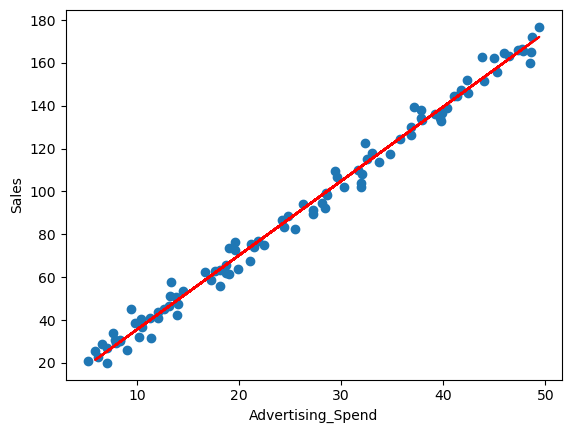

In [22]:
plt.scatter(df['Advertising_Spend'],df['Sales'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('Advertising_Spend')
plt.ylabel('Sales')

In [23]:
m = lr.coef_

In [24]:
b = lr.intercept_

In [25]:
m

array([3.4660305])

In [26]:
b

0.880541040334677

In [27]:
m * 21.8  + b

array([76.44000588])

In [28]:
m * 56.34 + b

array([196.15669926])